<a href="https://colab.research.google.com/github/Tommy199665/Sensen/blob/main/%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90(%E7%BE%8E%E5%9C%8B%E9%9D%92%E5%B0%91%E5%B9%B4%E5%B8%82%E5%A0%B4%E5%8D%80%E6%A0%BC%E6%A1%88%E4%BE%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分類(Cluster analysis) 集群分析 美國青少年市場區格案例 Clustering and market segmentation
產生Colab R 程式環境: https://colab.research.google.com/notebook#create=true&language=r

# 1.Facebook的使用者的習慣進行clustering分析  

In [ ]:
# Facebook的使用者的習慣進行clustering分析  
# 1.問題定義及分析目標
# 1-1 青少年使用facebook用語 
# 1-2 很多商家垂涎青少年市場, 其希望販賣零食,飲料, 3c產品及衛生保健產品.
# 1-3 現在你有一份30000名學生的facebook的profile資訊 - 
# 1-4 其包含全文資料,入學年,性別,年齡及朋友數. 
# 1-5 我們要如何找出具相同品味的市場區隔,以針對目標進行行銷？　 
# 1-6 這時因為我們要找到的是target segment. (青少年之間的族群分類?)
# 1-7 很明顯的我們可以用分群的演算法來看看是否可以找到什麼有趣的東西
# 1-8 文字分辨運動、宗教、音樂、流行、羅曼史與反社會行為等等用語來做分群依據?
# 1-9 如何收集到這些資料的呢???   利用文字探勘抽出所有頁面的前500個字
#                                   選定這36字代表五類興趣!
#                                   課外活動、宗教、流行、羅曼史與反社會行為
# 1-10 例如: basketball, cute, sexy, music, shopping, die and drugs

# 2.收集資料 

In [ ]:
# 2.收集資料 
# 請先看看原始 snsdata.csv 資料
# gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
# 2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
# 2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
# 2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
# 2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
# 2006,NA,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1

# teens <- read.csv(file.choose()) # please choose snsdata.csv
teens <- read.csv("/content/sample_data/snsdata.csv")
# 請先看看輸入後的 teens 資料

Warning message in file(file, "rt"):
“cannot open file '/content/sample_data/snsdata.csv': No such file or directory”


ERROR: ignored

In [ ]:
teens

In [ ]:
# 3.資料探索及準備(理解資料) 
# 首先我們來看一下資料內容
dim(teens)
# [1] 30000    40

In [ ]:
names(teens)
# [1] "gradyear"     "gender"       "age"          "friends"      "basketball"  
# [6] "football"     "soccer"       "softball"     "volleyball"   "swimming"    
# [11] "cheerleading" "baseball"     "tennis"       "sports"       "cute"        
# [16] "sex"          "sexy"         "hot"          "kissed"       "dance"       
# [21] "band"         "marching"     "music"        "rock"         "god"         
# [26] "church"       "jesus"        "bible"        "hair"         "dress"       
# [31] "blonde"       "mall"         "shopping"     "clothes"      "hollister"   
# [36] "abercrombie"  "die"          "death"        "drunk"        "drugs"

# [1] 畢業年分，性别，年龄，朋友，藍球，
# [6] 足球，足球，壘球，排球，游泳
# [11]啦啦隊，棒球，網球，運動，可爱
# [16]性，性感，火熱，親吻，跳舞
# [21]樂隊，游行，音樂，摇滚，上帝
# [26]教会，耶稣，聖經，頭髮，禮服
# [31]金髮女孩，購物中心，購物，衣服，潮牌Hollister
# [36] Abercrombie & Fitch是一間美國的零售商, 死亡, 死亡，醉酒，毒品

In [ ]:
#理解資料
str(teens)

# 3.探索與準備資料

# 探索與準備資料 01
- 先針對 data frame 做 summary 敘述性統計
- 第一步 我們要先知道是否資料完整 也就是沒有遺缺值(NA) *
- 發現gender and age (性別與年齡) 有遺落值 NA
- NAs only in gender and age

In [ ]:
summary(teens) 

In [ ]:
stem(teens$age,scale=1,width=80)

In [ ]:
stem(teens$friends,scale=1,width=80)

# 探索與準備資料 02

In [ ]:
# 探索與準備資料 02
# look at missing data for gender variable
# 在這里 你看以發現 只有 age及gender兩個變數 有不少NA
sum(is.na(teens$gender)) # 2724 NAs
sum(is.na(teens$age))    # 5086 NAs

In [ ]:
# 那些儲存格是 NA
which(is.na(teens), arr.ind=T)

In [ ]:
#我們來細看 gender的NA數量
table(teens$gender)   #利用 table 找出性別分佈，但是並沒有顯示 NA????
#     F     M 
# 22054  5222 

In [ ]:
table(teens$gradyear) 

In [ ]:
table(teens$gender, useNA = "ifany") # 9% of NAs, female is five times of male
#     F     M  <NA> 
# 22054  5222  2724 

ERROR: ignored

In [ ]:
table(teens$gender, useNA = "always")

In [ ]:
# look at missing data for age variable  >>> 數值型 用 summary() 查看 NA
summary(teens$age) # some illogical ages
#    Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
#   3.086  16.310  17.290  17.990  18.260 106.900    5086 
#   *年紀還有3 歲的青少年嗎?              *年紀還有 106 歲的青少年嗎?

In [ ]:
# 先處理 NA 與 不合理值
# 好! 我們還記得我們要找的是青少年的使用者, 
# 所以我們以年齡13到20歲去extract 取代我們age中的資料超過範圍就用NA取代
teens$age <- ifelse(teens$age >= 13 & teens$age < 20, teens$age, NA)  #用NA取代

In [ ]:
# 了解 ifelse 的用法嗎???
?ifelse
# ifelse(test, yes, no)

In [ ]:
# 5523 - 5086 = 437 NAs added NA取代 437個
summary(teens$age)
#   再看一次, 是不是不在範圍的資料變成NA - 所以總數提高
#    Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
#   13.03   16.30   17.26   17.25   18.22   20.00    5523 (原先 NA 5086 個)

# 探索與準備資料 03

In [ ]:
# 探索與準備資料 03
# 接下來  我們來處理gender的遺缺值(NA)
# 對性別的女性值進行虛擬編碼與遺缺值(NA)虛擬編碼(dummy coding)
# gender原始值為 M, F 及 NA
# 一般而言我們把NA當作unknown在將其性別個別拉出分成male 及 female 在給予編碼

# reassign missing gender values to "unknown"
teens$female  #欲產生新的變數 female 紀錄女性值
#NULL

In [ ]:
table(teens$gender, useNA = "ifany")
#     F     M  <NA> 
# 22054  5222  2724 

In [ ]:
#虛擬編碼 1 for Male, 0 for Female
teens$female <- ifelse(teens$gender == "F" & !is.na(teens$gender), 1, 0) 
teens$female

In [ ]:
table(teens$female)
#    0     1 
# 7946 22054 
# 7946 = 5222+2724  NA 加給 Male 男性

In [ ]:
# 常見的邏輯判斷符號
# 
# 以下介紹常見的邏輯判斷的符號。
# <、>：小於、大於。
# <=、>=：小於等於、大於等於。
# ==、!=：等於、不等於。
# A %in% B：A 是否在 B 中。
# &&、＆:交集，& 適用於向量式的邏輯判斷，&& 適用於單一值的邏輯判斷。
# ||、|：聯集，| 適用狀況與 & 相同，|| 適用狀況與 && 相同。
z = c(1,2,3)
z > 0 & z > -1
#[1] TRUE TRUE TRUE
z > 0 & z > 2
# [1] FALSE FALSE  TRUE
z > 0 && z > -1 # && 只可以比較單一值，所以只有抓 z 的第一元素跟 0 與 -1 比較。
#[1] TRUE

#  end of 常見的邏輯判斷符號

In [ ]:
# 遺缺值(NA)虛擬編碼(dummy coding)
teens$no_gender <- ifelse(is.na(teens$gender), 1, 0)
teens$no_gender

In [ ]:
#我們看一下剛剛的改變, 是不是已經把NA分開了
table(teens$no_gender)
#     0     1 
# 27276  2724 (2724 個NA值)

In [ ]:
# check our recoding work
table(teens$gender, useNA = "ifany")
#     F     M  <NA> 
# 22054  5222  2724 

In [ ]:
table(teens$female, useNA = "ifany")
#    0     1 
# 7946 22054

In [ ]:
table(teens$no_gender, useNA = "ifany")
#     0     1 
# 27276  2724 

# 探索與準備資料 04

In [ ]:
# 探索與準備資料 04
# 年齡遺漏值填補(imputation)，以同年級平均年齡填補
# 利用 aggregate and ave  函數
# Why imputation???? 因為多數統計函數須將NA值移除後才能計算。

# 下一步 我們來處理新的age segment中的NA值
# 接下來的手法是所謂imputation - 就是用同年級 - 
# 也就是gradyear (從2006~ 2009年)的平均年齡來替換NA的部分

In [ ]:
mean(teens$age) # doesn't work, return 'NA'. WHY????
#[1] NA

In [ ]:
summary(teens$age)
# Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
#13.03   16.30   17.26   17.25   18.22   20.00    5523*** 

In [ ]:
# 發現嗎? 如果數值資料中有NA, R不能計算而直接return NA
# 所以你加入 na.rm = TRUE的參數給mean()

mean(teens$age, na.rm = TRUE)
# [1] 17.25243

## 依據學年(gradyear)將青少年分組 << 使用 aggregate

In [ ]:
# 依據學年(gradyear)將青少年分組 << 使用 aggregate
# 在計算各組平均年齡(NA 需排除 na.rm = TRUE)

# 我們現在來使用 aggregate及ave來組合我們要作的工作
# 找出忽略na的欄位並已gradyear為準, age的平均數為何

aggregate(data = teens, age ~ gradyear, FUN = mean, na.rm = TRUE) # finding the mean age by cohort

#   gradyear      age
# 1     2006 18.65586
# 2     2007 17.70617
# 3     2008 16.76770
# 4     2009 15.81957

## # aggregate函數

In [ ]:
# aggregate函數
# 這個函數的功能比較強大，它首先將數據進行分組（按行），然後對每一組數據進行函數統計，最後把結果組合成一個比較nice的表格返回。根據數據對象不同它有三種用法，分別應用於數據框（data.frame）、公式（formula）和時間序列（ts）：
# aggregate(x, by, FUN, ..., simplify = TRUE) 
# aggregate(formula, data, FUN, ..., subset, nana.action = na.omit) 
# aggregate(x, nfrequency = 1, FUN = sum, ndeltat = 1, ts.eps = getOption("ts.eps"), ...)
str(mtcars) 

# 先用attach函數把mtcars的列變量名稱加入到變量搜索範圍內，然後使用aggregate函數按cyl（汽缸數）進行分類計算平均值：
attach(mtcars) 
aggregate(mtcars, by=list(cyl), FUN=mean)

# by参數也可以包含多個類型的因子，得到的就是每個不同因子組合的統計結果：
aggregate(mtcars, by=list(cyl, gear), FUN=mean)

#公式（formula）是一種特殊的R數據對象，在aggregate函數中使用公式参數可以對數據框的部分指標進行統計：
aggregate(cbind(mpg,hp) ~ cyl+gear, FUN=mean) 

# 上面的公式 cbind(mpg,hp) ~ cyl+gear 表示使用 cyl 和 gear 的因子組合對 cbind(mpg,hp) 數據進行操作。
# aggregate在時間序列數據上的應用請参考R的函數說明文檔。

# end of # aggregate函數

## 創建30000名青少年依據學年的分組平均年齡向量

In [ ]:
# 創建30000名青少年依據學年的分組平均年齡向量
#我們接下來已平均值, avg_age去替換age中na的部分
# calculating the expected age for each person according to her/his gradyear
ave_age <- ave(teens$age, teens$gradyear, FUN = function(x) mean(x, na.rm = TRUE)) 

# you have to create a function, otherwise...

In [ ]:
ave_age[1:50]

In [ ]:
table(ave_age)

In [ ]:
#我們接下來已平均值, avg_age去替換age中na的部分
summary(teens$age)
#    Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
#   13.03   16.30   17.26   17.25   18.22   20.00    5523 

## 若是觀測值年齡遺缺則填入同組平均年齡，否則保留原先合理年齡值(要記得修正是否正確????)

In [ ]:
# 若是觀測值年齡遺缺則填入同組平均年齡，否則保留原先合理年齡值(要記得修正是否正確????)
teens$age <- ifelse(is.na(teens$age), ave_age, teens$age)

In [ ]:
#接下來以summary看一下結果
# check the summary results to ensure missing values are eliminated
summary(teens$age) # reasonable statistics
#  Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
# 13.03   16.28   17.24   17.24   18.21   20.00 >> 已經沒有 NA值了

# 4.訓練模型

In [ ]:
### 4.訓練模型 
# 訓練模型01
# 現在來挑選我們的feature set - 也就是選擇你要mining的屬性, 
# 基本上因為我們要找出segment像學年gradyear,性別gender, age我們就直接skip 

In [ ]:
names(teens[5:40])

In [ ]:
# 屬性挑選:以36個字準備進行 群集分析
interests <- teens[5:40] # gradyear, gender, age, friends, female, no_gender are omitted

In [ ]:
interests

In [ ]:
dim(interests)
# [1] 30000    36

In [ ]:
head(interests)

# 訓練模型02

In [ ]:
# 訓練模型02
# 各字的 次數量綱不一(why???) 所以需要進行屬性正規化(normalization or centering & scaling)，
# 避免某些屬性(dominate)凌駕其他的屬性 >> 藉由 lapply 函數完成

# interests_z <- scale(interests) # interests_z 不再是data.frame，而是一matrix
# interests_z
# basketball   football     soccer   softball volleyball   swimming cheerleading   baseball
# [1,] -0.3322117 -0.3576914 -0.2428701 -0.2179242 -0.2236659 -0.2599662   -0.2073236 -0.2011273
# [2,] -0.3322117  1.0600312 -0.2428701 -0.2179242 -0.2236659 -0.2599662   -0.2073236 -0.2011273
# [3,] -0.3322117  1.0600312 -0.2428701 -0.2179242 -0.2236659 -0.2599662   -0.2073236 -0.2011273
# class(interests_z)
# # [1] "matrix"
## data.frame(scale(interests))
summary(interests)

## 變數均一化

In [ ]:
interests_z <- as.data.frame(lapply(interests, scale)) #變數均一化

In [ ]:
# 可以看到資料都轉換成統一的z-value
head(interests_z)

In [ ]:
summary(interests_z)

## 再來為了避免有些屬性dominate其他的, 我們使用lapply配合scale這個參數來對整體資料
- 作normalization - 也就是使用z score (不清楚原理的朋友可以看一下wiki http://en.wikipedia.org/wiki/Standard_score)

In [ ]:
apply(interests_z, 2, mean)

In [ ]:
apply(interests_z, 2, sd)  #1

In [ ]:
?scale
# Scaling and Centering of Matrix-like Objects
# Usage
# 
# scale(x, center = TRUE, scale = TRUE)

# 訓練模型03

In [ ]:
# 訓練模型03
# 現在來使用k-mean演算法 及先以centers = 5 去看一下結果
# (why center = 5???)
# The Breakfast Club (Movie Analysis) and Teen Stereotypes - Judith Andre
# https://hubpages.com/entertainment/The-Breakfast-Club-Movie-Stereotypes
# https://hopekjohnston.wordpress.com/   <<<  五個分類 由來
# 1. The Brain (Brian):
# 2. The Princess (Claire):
# 3. The Criminal (Bender):
# 4. The Basket Case (Allison):
# 5. The Athlete (Andrew):

?kmeans

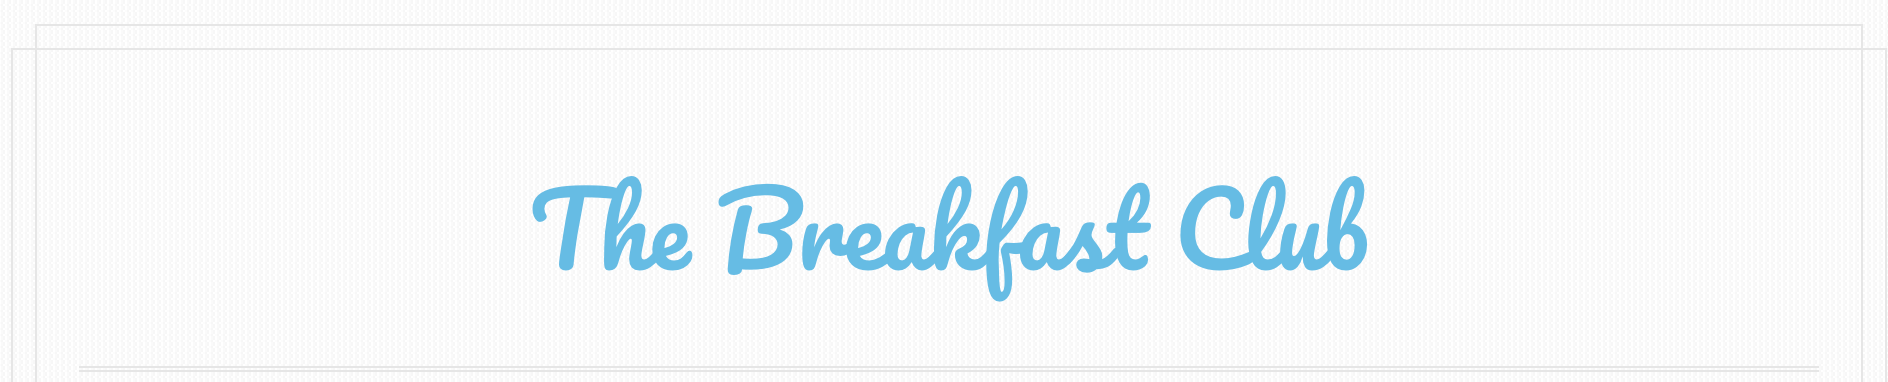

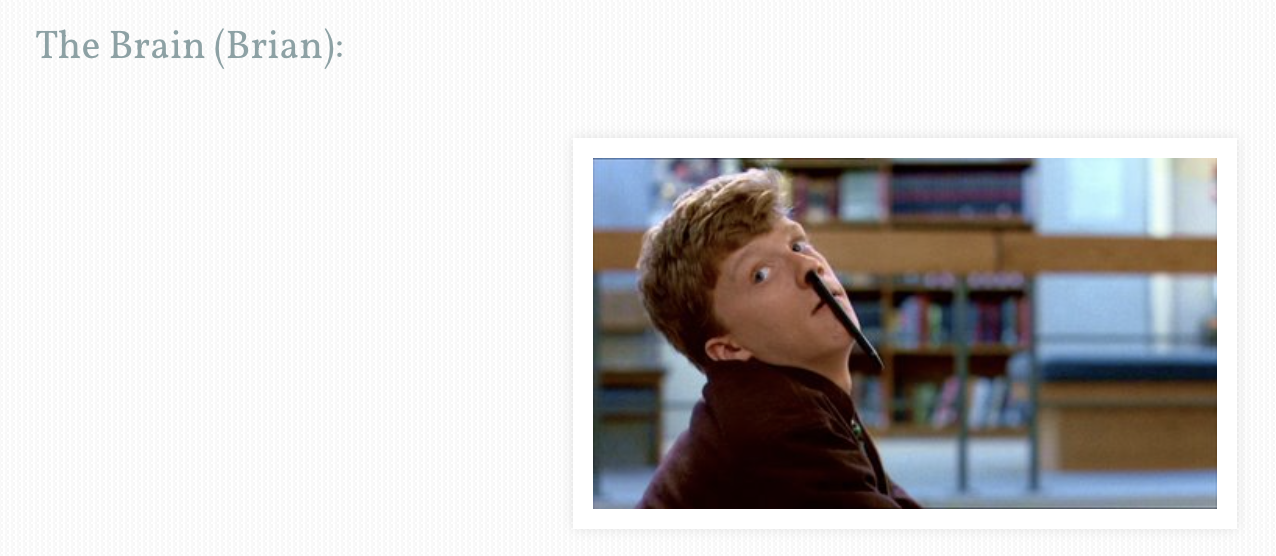 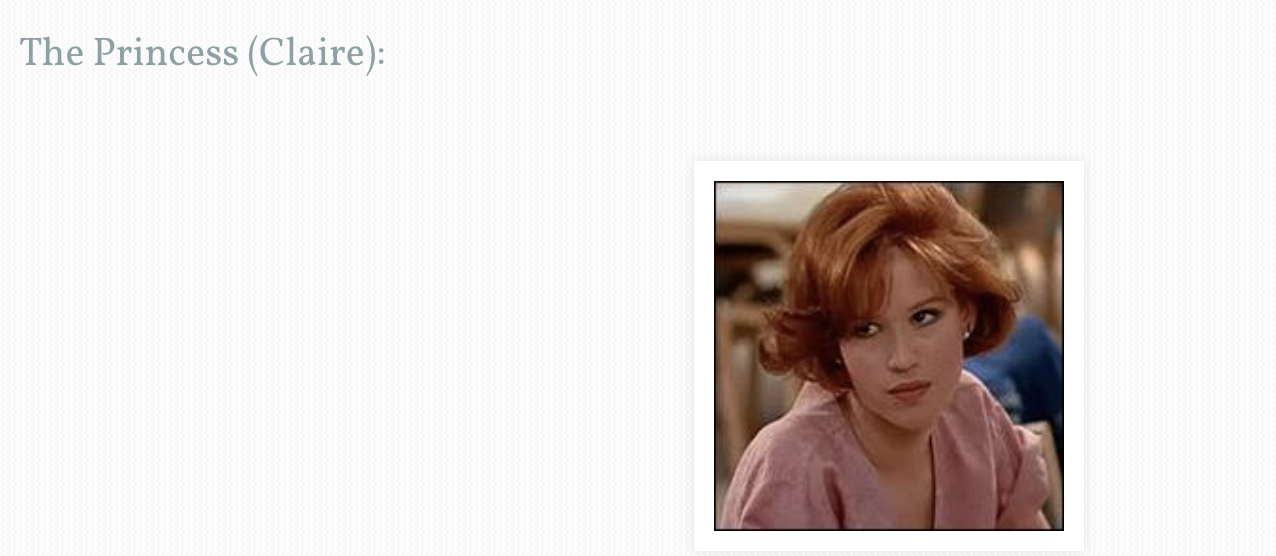

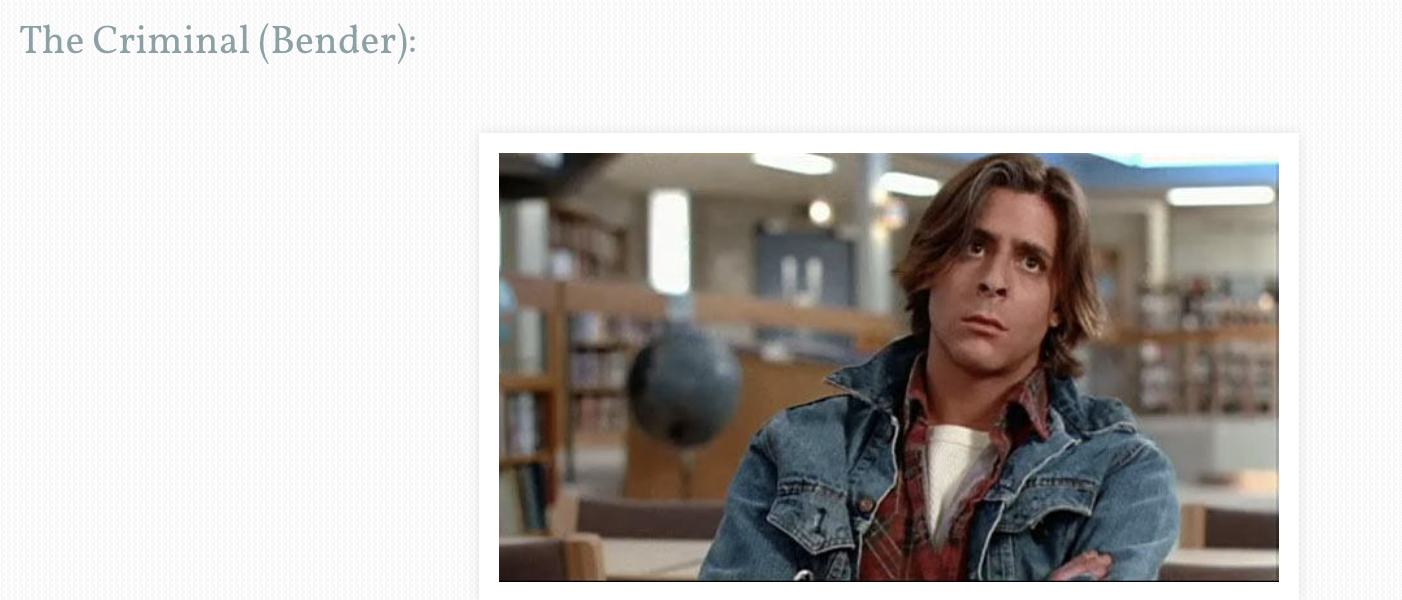
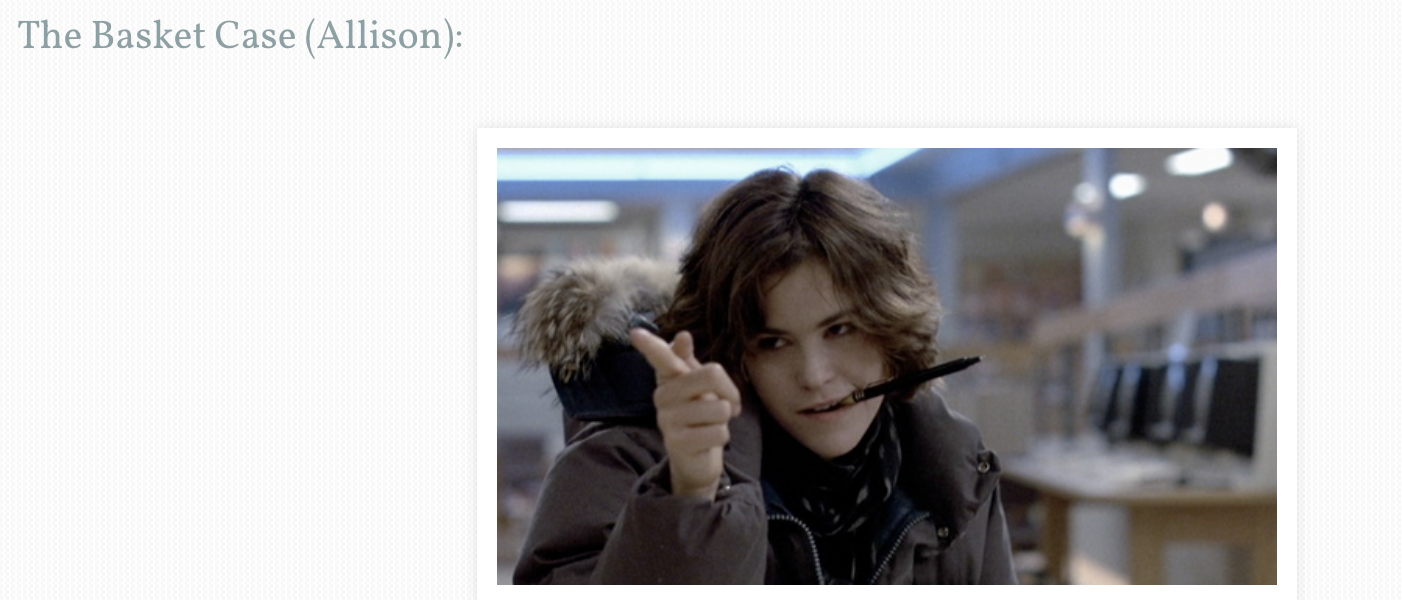

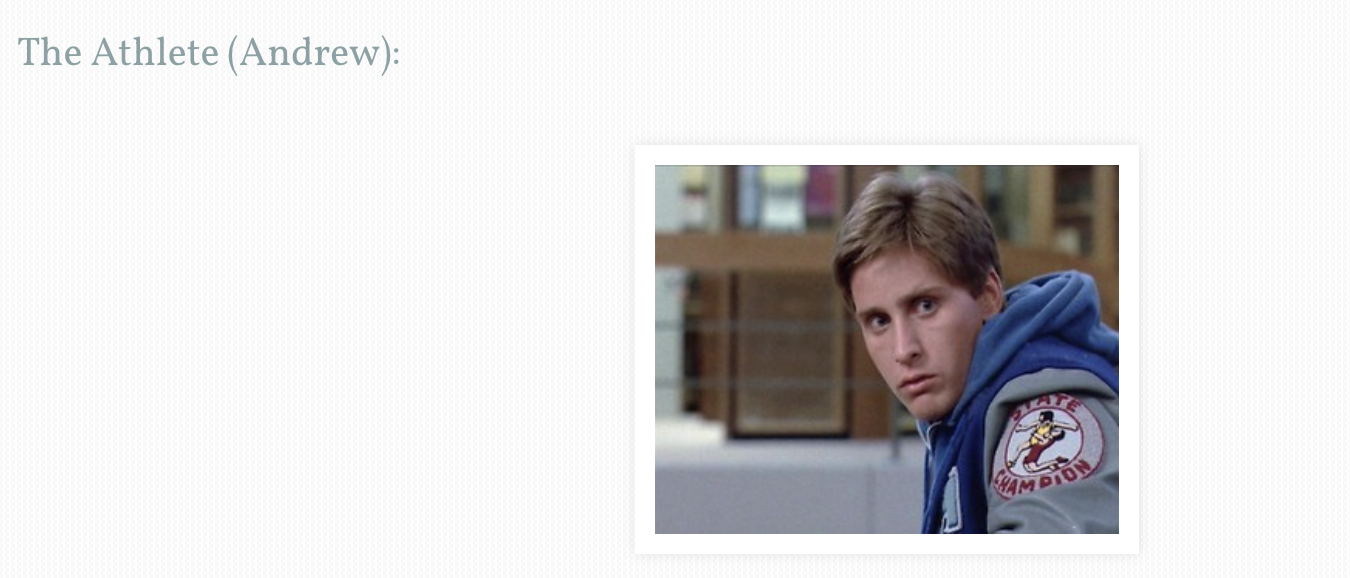

# 5.K Means 建模：

In [ ]:
teen_clusters01 = kmeans(interests_z, center=5)

class(teen_clusters01)

In [ ]:
# 其會產生一個list, 其中包含30000筆資料的分群結果cluster 及像centers及size的重要參數
str(teen_clusters01)

In [ ]:
# kmeans Value 解釋:
# kmeans returns an object of class "kmeans" which has a print and a fitted method. It is a list with at least the following components:
# cluster	
# A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
# centers	
# A matrix of cluster centres.
# totss	
# The total sum of squares.
# withinss	
# Vector of within-cluster sum of squares, one component per cluster.
# tot.withinss	
# Total within-cluster sum of squares, i.e. sum(withinss).
# betweenss	
# The between-cluster sum of squares, i.e. totss-tot.withinss.
# size	
# The number of points in each cluster.
# iter	
# The number of (outer) iterations.
# ifault	
# integer: indicator of a possible algorithm problem – for experts.

# kmeans 返回一個“kmeans”類的對象，它有一個 print 和一個 fit 方法。 它是一個至少包含以下組件的列表：
# 簇
# 一個整數向量（從 1:k 開始），表示每個點被分配到的集群。
# 個中心
# 一個聚類中心矩陣。
#totss
# 總平方和。
# 內在
# 簇內平方和的向量，每個簇一個分量。
# tot.withinss
# 簇內總平方和，即 sum(withinss)。
# 中間
# 簇間平方和，即 totss-tot.withinss。
# 尺寸
# 每個簇中的點數。
# 迭代
# （外部）迭代次數。
# 故障
# 整數：可能的算法問題的指標——對於專家。


In [ ]:
# 可以用name()去得知　
names(teen_clusters01)

In [ ]:
# 五個 withinss(內在) 合為 tot.withinss;   tot.withinss VS betweenss
teen_clusters01$cluster[1:300]

In [ ]:
table(teen_clusters01$cluster)

In [ ]:
#方法二
set.seed(1)
teen_clusters <- kmeans(interests_z, centers=5, iter.max=50, nstart = 20) 
# because of the film "The Breakfast Club"
# Can parallelize above clustering procedure?
# nstart ?

In [ ]:
class(teen_clusters)   #"kmeans"

In [ ]:
str(teen_clusters)     #看看分群完後的資料變數  $ cluster 等

In [ ]:
names(teen_clusters)

In [ ]:
teen_clusters$cluster[1:300]

In [ ]:
table(teen_clusters$cluster)

# 6.評估模型績效

In [ ]:
# 評估模型績效
# 非監督式學習的結果評估有些主觀
# 質化 vs 量化 (cluster validity 有效性, 組內平方和/組間平方和)
# 太大或太小的分群用處不大

teen_clusters$size # look at the size of the clusters
#     1      2      3     4    5
# [1] 21386  1034   807   871  5902  >>> total ?

# 7.集群分析結果需要人的介入解讀

In [ ]:
#集群分析結果需要人的介入解讀
teen_clusters$centers # look at the cluster centers

# 8.模型解讀?????:

In [ ]:
### 模型解讀?????:
# 第  群: Princessess (與服飾品牌的關係)
# 第  群: Criminals (與叛逆與超齡事件的關係)
# 第  群: Bastet Cases (諸事漠不關心的一群)
# 第  群: Athelete (與運動數字的關係)
# 第  群: Brain (有大腦聰明囉!)

# 9.各群詞頻高低視覺化

In [ ]:
# 各群詞頻高低視覺化
matplot(t(teen_clusters$centers), type='b')

In [ ]:
colnames(teen_clusters$centers)

# 'basketball''football''soccer''softball''volleyball''swimming''cheerleading''baseball''tennis''sports''cute'
# 'sex''sexy''hot''kissed''dance''band''marching''music''rock''god''church''jesus''bible''hair''dress''blonde'
# 'mall''shopping''clothes''hollister''abercrombie''die''death''drunk''drugs'
# '籃球''足球''足球''壘球''排球''游泳''啦啦隊''棒球''網球''運動''可愛''性愛''性感''火辣''親吻''舞蹈''樂隊 ''行進''音樂'
# '搖滾''上帝''教堂''耶穌''聖經''頭髮''禮服''金發女郎''商場''購物''衣服''hollister''abercrombie''死'' 死亡''喝醉''毒品'

In [ ]:
# append the cluster IDs to the original data frame
teens$cluster
#NULL

In [ ]:
teensResult <- teens
dim(teensResult)
# [1] 30000    42

In [ ]:
teensResult

In [ ]:
teensResult$cluster
#NULL

In [ ]:
teensResult$cluster <- teen_clusters$cluster
dim(teensResult)
# [1] 30000    43

In [ ]:
teensResult

In [ ]:
# look at the first five records
teensResult[1:5, c("cluster", "gender", "age", "friends")]
#   cluster gender    age friends
# 1       1      M 18.982       7
# 2       5      F 18.801       0
# 3       1      M 18.335      69
# 4       1      F 18.875       0
# 5       2   <NA> 18.995      10

# 結論01:依據群號將青少年分組並計算各群組的平均年齡

In [ ]:
## 依據群號將青少年分組並計算各群組的平均年齡
#  差異不大 why?
aggregate(data = teensResult, age ~ cluster, FUN = 'mean', na.rm = TRUE) # mean age by cluster, not vary much by cluster
#   cluster      age
# 1       1 17.29687
# 2       2 17.11957
# 3       3 17.37390
# 4       4 16.86497
# 5       5 17.07847

# 結論02:請注意 Princessess (與服飾品牌的關係) 與性別的關係

In [ ]:
## 依據群號將青少年分組並計算各群女生的比例
## 請注意 Princessess (與服飾品牌的關係) 與性別的關係
aggregate(data = teensResult, female ~ cluster, FUN = 'mean') # proportion of females by cluster
#     cluster    female
# # 1       1 0.6995698
# # 2       2 0.8027079  >> Princessess (與服飾品牌的關係)
# # 3       3 0.7323420
# # 4       4 0.8381171  >> Princessess (與服飾品牌的關係)
# # 5       5 0.8373433  >> Princessess (與服飾品牌的關係)

# 結論03:請注意 Criminals (與叛逆與超齡事件的關係) 與 Bastet Cases (諸事漠不關心的一群) 的平均朋友數

In [ ]:
## 依據群號將青少年分組並計算各群的平均朋友數
## 請注意 Criminals (與叛逆與超齡事件的關係) 與 Bastet Cases (諸事漠不關心的一群) 的平均朋友數
aggregate(data = teensResult, friends ~ cluster, FUN = 'mean') # mean number of friends by cluster
#   cluster  friends
# 1       1 27.66754   >> Bastet Cases (諸事漠不關心的一群)
# 2       2 30.50290   >> Princessess (與服飾品牌的關係)
# 3       3 32.73606
# 4       4 41.43054
# 5       5 37.21484

In [ ]:
names(teensResult)

In [ ]:
# clothes ~ cluster. >> group 4
aggregate(data = teensResult, clothes ~ cluster, FUN = 'mean')

### 模型解讀?????:
# 第  群: Princessess (與服飾品牌的關係)
# 第  群: Criminals (與叛逆與超齡事件的關係)
# 第 3 群: Bastet Cases (諸事漠不關心的一群)
# 第  群: Athelete (與運動數字的關係)
# 第  群: Brain (有大腦聰明囉!)

In [ ]:
## Can we make a table for the five highest words in each cluster?
# apply(teen_clusters$centers, 1, order, decreasing=T)
# apply(teen_clusters$centers, 1, order, decreasing=T)[1:10,]
word_idx <- apply(teen_clusters$centers, 1, order, decreasing=T)[1:20,]
word_idx

In [ ]:
word_name <- names(teensResult)[-(c(1:4,41:43))]
word_name

In [ ]:
word_name[word_idx[ ,1]] # Athelete ? 每次執行或許不同 


In [ ]:
word_name[word_idx[ ,2]] # Basket Cases ?


In [ ]:
word_name[word_idx[ ,3]] # Princesses ?


In [ ]:
word_name[word_idx[ ,4]] # Criminal ?


In [ ]:
word_name[word_idx[ ,5]] # Brain ?

In [ ]:
matplot(t(teen_clusters$centers), type='b')
colnames(teen_clusters$centers)

# 選好你的分類了嗎????

In [ ]:
### 選好你的分類了嗎????

### K-Means 集群分析 討論 -------
# 事前需合理估算資料有多少集群存在???